Data Analysis

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
#load data
df=pd.read_csv('merged.csv')

In [33]:
#clean up the data 
data=df[['Image_vividness', 'age', 'response_time','cue_type', 'gender', 'participant_id']]
data.loc[:, 'Image_vividness'] = data['Image_vividness'].bfill()
data=data.dropna(subset='participant_id')

data

,Image_vividness,age,response_time,cue_type,gender,participant_id
0,2.0,23.0,0.357192,no_cue,f,1.0
1,2.0,23.0,0.635730,mental_cue,f,1.0
2,2.0,23.0,1.243764,mental_cue,f,1.0
3,2.0,23.0,1.405153,mental_cue,f,1.0
4,2.0,23.0,0.326765,visual_cue,f,1.0
...,...,...,...,...,...,...
482,5.0,25.0,0.983961,no_cue,m,8.0
483,5.0,25.0,0.957305,no_cue,m,8.0
484,5.0,25.0,0.551135,mental_cue,m,8.0
485,5.0,25.0,1.165409,mental_cue,m,8.0


In [34]:
data[['Image_vividness', 'age', 'response_time']].describe()

,Image_vividness,age,response_time
count,480.00000,480.000000,480.000000
mean,3.37500,24.875000,1.112449
std,1.21962,1.054368,0.706723
min,2.00000,23.000000,0.295889
25%,2.00000,24.750000,0.735865
50%,3.50000,25.000000,0.956534
75%,4.25000,25.000000,1.304018
max,5.00000,27.000000,7.385785


In [47]:
participants_df = data[['participant_id', 'gender', 'age', 'Image_vividness']].drop_duplicates().reset_index()
participants_df

,index,participant_id,gender,age,Image_vividness
0,0,1.0,f,23.0,2.0
1,61,2.0,f,27.0,3.0
2,122,3.0,m,25.0,2.0
3,183,4.0,m,25.0,4.0
4,244,5.0,m,25.0,5.0
5,305,6.0,m,25.0,4.0
6,366,7.0,m,24.0,2.0
7,427,8.0,m,25.0,5.0


c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

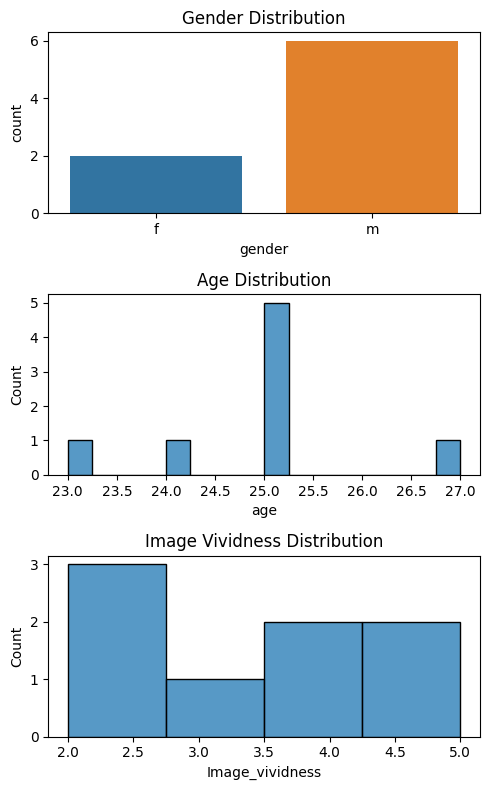

In [51]:

# Assuming 'df' is your DataFrame
fig, axs = plt.subplots(3, figsize=(5,8))

# Plot for 'gender' column
sns.countplot(x='gender', data=participants_df, ax=axs[0])
axs[0].set_title('Gender Distribution')

# Plot for 'age' column
sns.histplot(participants_df['age'], kde=False, ax=axs[1])
axs[1].set_title('Age Distribution')

# Plot for 'Image_vividness' column
sns.histplot(participants_df['Image_vividness'], kde=False, ax=axs[2])
axs[2].set_title('Image Vividness Distribution')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'response_time'}>]], dtype=object)

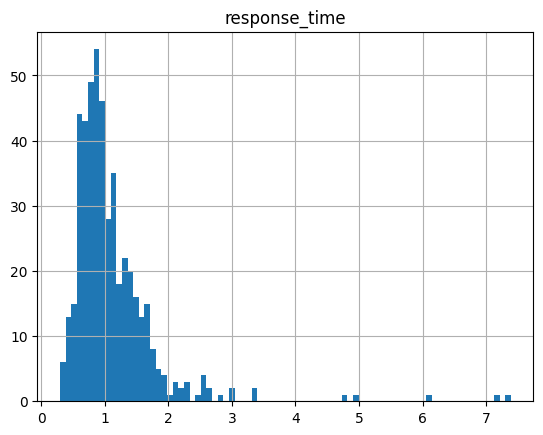

In [71]:
data[['response_time']].hist(bins=80)

c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

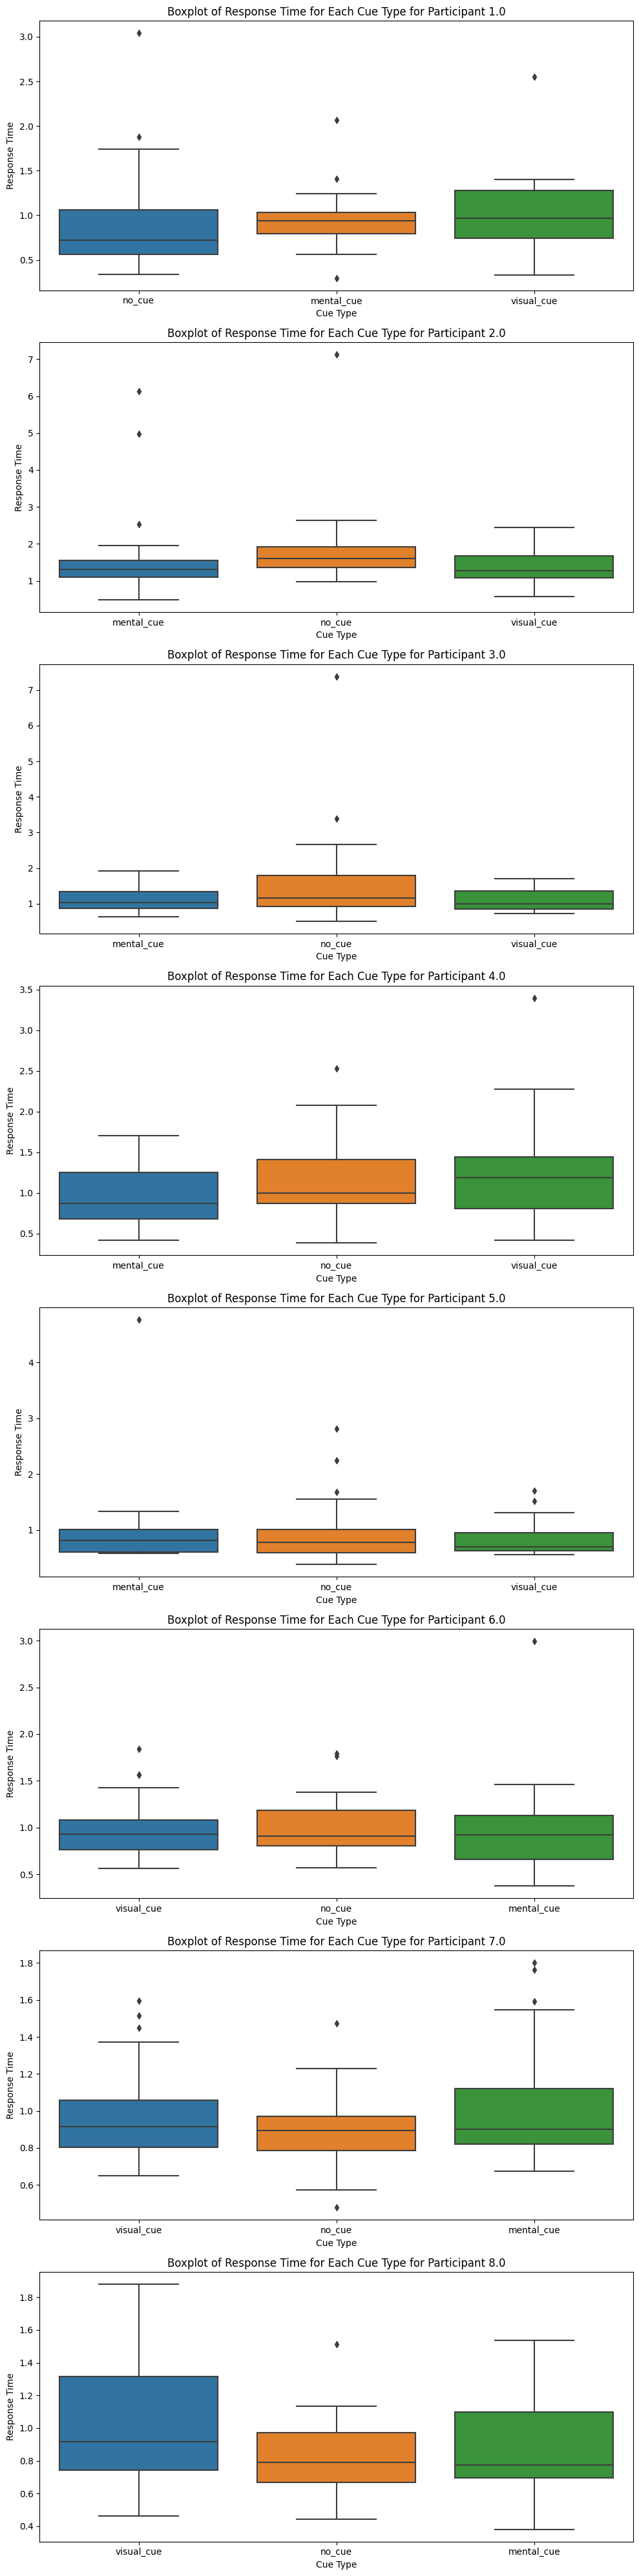

In [79]:
participants = data['participant_id'].unique()
cue_types = data['cue_type'].unique()

# Define a list of colors for the different cue types
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
# If you have more than 7 cue types, you will need to extend this list

fig, axs = plt.subplots(len(participants), 1, figsize=(10, 5*len(participants)))

for i, participant in enumerate(participants):
    # Filter data for the current participant
    participant_data = data[data['participant_id'] == participant]

    # Create a boxplot for each cue type
    sns.boxplot(x='cue_type', y='response_time', data=participant_data, ax=axs[i])

    axs[i].set_title('Boxplot of Response Time for Each Cue Type for Participant {}'.format(participant))
    axs[i].set_xlabel('Cue Type')
    axs[i].set_ylabel('Response Time')

plt.tight_layout()
plt.show()


c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


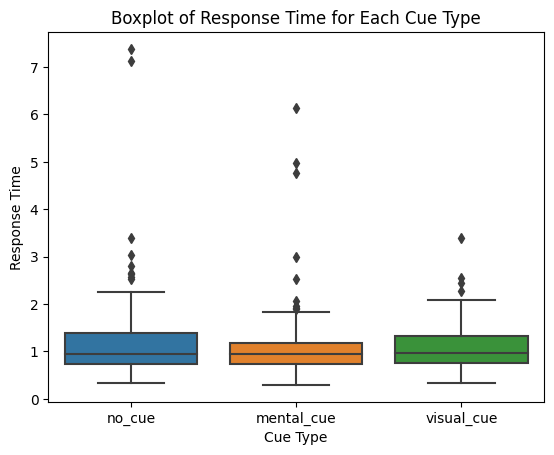

In [81]:
sns.boxplot(x='cue_type', y='response_time', data=data)

plt.title('Boxplot of Response Time for Each Cue Type')
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.show()

c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

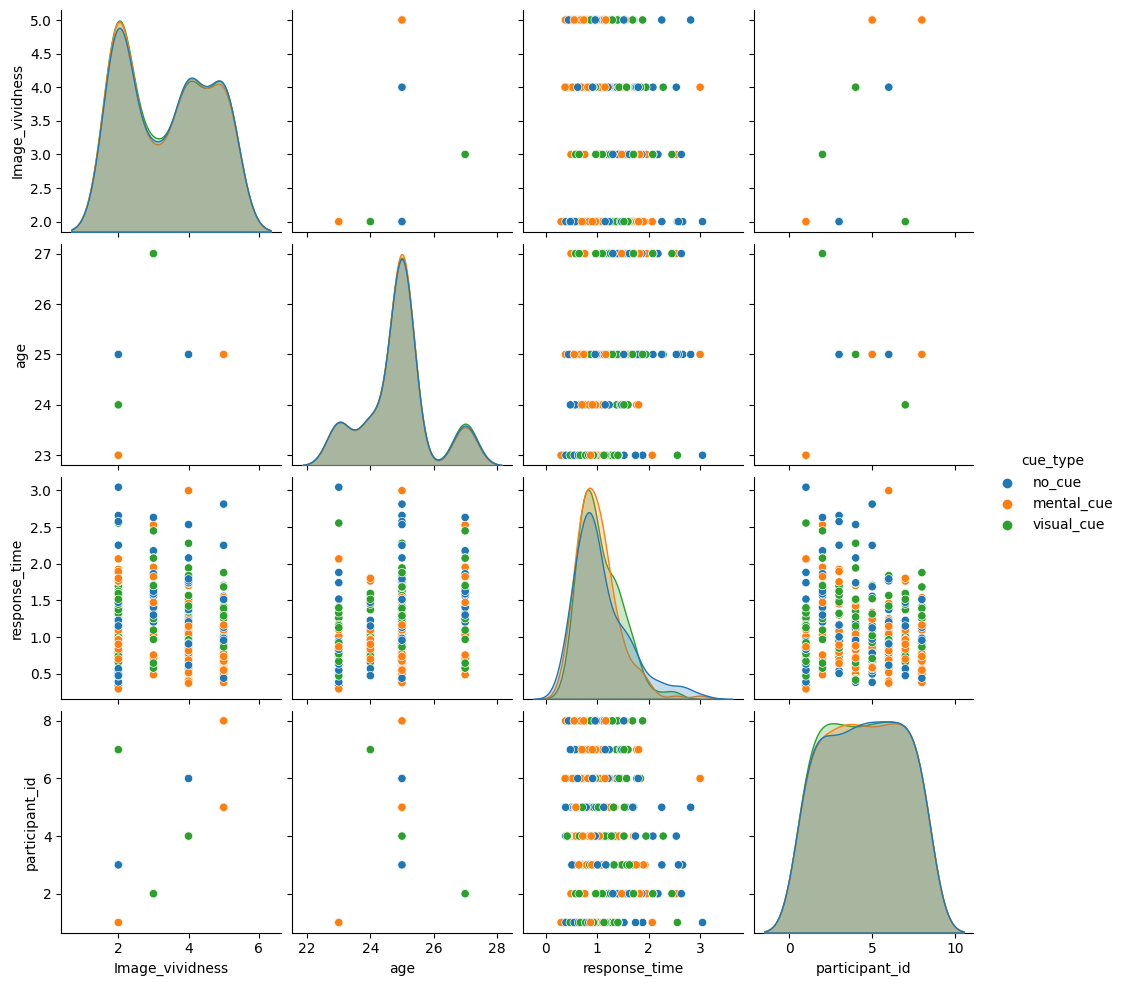

One-Way ANOVA for response_time: F = 1.426072752060687 P = 0.24128820421606


In [85]:
# For outlier detection, you can use Z-score (or any other suitable method depending on your data)
z_scores = np.abs(stats.zscore(data[['Image_vividness', 'age', 'response_time']]))
data = data[(z_scores < 3).all(axis=1)] # Keep only rows with z-score < 3

# Visualize your data
sns.pairplot(data, hue='cue_type')
plt.show()

# For statistical analyses, you can use suitable methods based on your data and hypothesis
# Since you have a categorical independent variable (cue_type) and continuous dependent variables,
# One-Way ANOVA can be a suitable method

# Get unique cue_types
cue_types = data['cue_type'].unique()

# Perform One-Way ANOVA for 'Image_vividness'
f_val, p_val = stats.f_oneway(*(data.loc[data['cue_type'] == ct, 'response_time'] for ct in cue_types))
print("One-Way ANOVA for response_time: F =", f_val, "P =", p_val)



The One-Way Analysis of Variance (ANOVA) is a statistical test used to determine whether there are any significant differences between the means of three or more independent (unrelated) groups. The null hypothesis for the test is that all groups have the same population mean (i.e., no effect), and the alternative hypothesis is that at least one group has a different population mean (i.e., an effect exists).

The F-value in the ANOVA test also determines the significance of the overall test. The larger the F-value, the smaller is the p-value, and the more evidence there is against the null hypothesis.

The p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true. If the p-value is less than or equal to the significance level (usually 0.05), you reject the null hypothesis in favor of the alternative hypothesis.

The F-value is 1.426072752060687 and the p-value is 0.24128820421606. Since the p-value is greater than 0.05, you would not reject the null hypothesis. This means that you don’t have enough evidence to conclude that a significant difference exists between the group means. In other words, the type of cue does not have a significant effect on the response time.